In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
import seaborn as sns

**1. Reading Train and Test files**

In [2]:
train_data=pd.read_csv('Gotem Pumpkins.csv')
test_data=pd.read_csv('Freyja_Pumpkins.csv')
train_data.drop(['Unnamed: 0'],axis='columns',inplace=True)
test_data.drop(['Unnamed: 0'],axis='columns',inplace=True)
train_data.head(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,84930,1204.448,508.7883,213.0266,85665,328.8407,0.9081,0.9914,0.5482,0.7357,2.3884,0.6463,Ürgüp Sivrisi
1,103343,1275.261,521.4694,252.8941,104156,362.7401,0.8745,0.9922,0.7457,0.7985,2.0620,0.6956,Ürgüp Sivrisi
2,98350,1269.539,526.2346,238.4702,99184,353.8688,0.8914,0.9916,0.5919,0.7668,2.2067,0.6725,Ürgüp Sivrisi
3,69517,1059.538,429.8407,206.8250,70493,297.5093,0.8766,0.9862,0.6623,0.7782,2.0783,0.6921,Çerçevelik
4,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
5,66301,1021.671,402.0054,210.7404,67036,290.5461,0.8516,0.9890,0.7473,0.7982,1.9076,0.7227,Çerçevelik
6,86511,1131.452,430.6553,256.7710,87397,331.8874,0.8028,0.9899,0.7453,0.8492,1.6772,0.7707,Çerçevelik
7,66755,978.902,372.6831,228.9288,67308,291.5392,0.7891,0.9918,0.7326,0.8754,1.6279,0.7823,Çerçevelik
8,103248,1253.276,489.6105,269.4285,104423,362.5734,0.8350,0.9887,0.6606,0.8260,1.8172,0.7405,Çerçevelik
9,56882,926.303,368.0150,197.4554,57544,269.1178,0.8439,0.9885,0.7403,0.8331,1.8638,0.7313,Çerçevelik


In [3]:
null_counts = train_data.isnull().sum() #Checking the amount of NaN values in the Training Data
print(null_counts)

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64


In [4]:
null_counts = test_data.isnull().sum() #Checking the amount of NaN values in the Training Data
print(null_counts)

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64


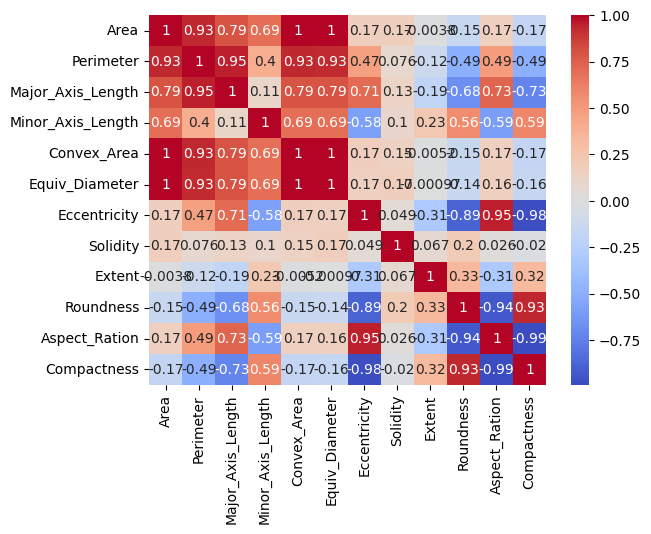

In [5]:
train_corr = train_data.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(train_corr, annot=True, cmap='coolwarm')
plt.show()

We can drop the features which are highly correlated

In [6]:
train_data=train_data.drop(['Perimeter','Convex_Area','Equiv_Diameter','Aspect_Ration','Compactness'],axis=1)
test_data=test_data.drop(['Perimeter','Convex_Area','Equiv_Diameter','Aspect_Ration','Compactness'],axis=1)

**As the neither the train data nor test data seem to have any NaN values we are good to go**

In [7]:
x1=train_data.drop(['Class'],axis='columns').values #Converting our training examples and features into a  Numpy array
y1=train_data['Class'].values.reshape(-1,1) #Converting our output into a Numpy array
x2=test_data.drop(['Class'],axis='columns').values
y2=test_data['Class'].values.reshape(-1,1)

**Step 2 :As we can see the column Class has the outputs Ürgüp Sivrisi and Çerçevelik which we can correspond to Numeric values 0 and 1 respectively to fit our classification model**

In [8]:
y1 = np.where(y1 == 'Ürgüp Sivrisi', 1, 0)
y2 = np.where(y2 == 'Ürgüp Sivrisi', 1, 0)
x1 = x1.astype('float64')
x2 = x2.astype('float64')

# Z-Score Normalization

In [9]:
mean1=np.mean(x1,axis=0) # Performing Z score normalisation for the Datasets to bring them to comparable values
std1=np.std(x1,axis=0)
x1=(x1-mean1)/std1
x2=(x2-mean1)/std1



# Training the Model
---



**Sigmoid Function**

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


**Cost Function for Logistic regression**

In [11]:
z_values=[print]
def compute_cost(x, y, weights, bias):
    m = len(y)
    z = np.dot(x, weights) + bias
    z_values.append(z)
    y_pred = sigmoid(z)
    cost = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) #New type of cost function which provides a convex cost function
    return cost

**Gradient Descent**

In [12]:
def gradient_descent(x, y, weights, bias, learning_rate, num_iterations):
    m = len(y)
    costs = []
    for i in range(num_iterations):
        z = np.dot(x, weights) + bias
        y_pred = sigmoid(z)
        cost = compute_cost(x, y, weights, bias)
        costs.append(cost)
        weights_gradient = (1/m) * np.dot(x.T, (y_pred - y))
        bias_gradient = (1/m) * np.sum(y_pred - y)
        weights -= learning_rate * weights_gradient
        bias -= learning_rate * bias_gradient
    return weights, bias, costs


**Predicting the outputs**

In [13]:
 def predict(x, weights, bias):
    z = np.dot(x, weights) + bias
    y_pred = sigmoid(z)
    y_pred_class = np.where(y_pred >= 0.5, 1, 0)
    return y_pred_class

In [14]:
weights=np.zeros((x1.shape[1],1))
bias=0
learning_rate=0.02
num_iterations=1000
weights,bias,costs=gradient_descent(x1,y1,weights,bias,learning_rate,num_iterations)

**Weights After Gradient Descent has been performed**

In [15]:
weights

array([[ 0.17395605],
       [ 0.7398848 ],
       [-0.67691022],
       [ 0.98017801],
       [ 0.46175416],
       [-0.01405865],
       [-0.81810492]])

In [16]:
train_predicted=predict(x1,weights,bias)     # Obtaining the predicted outputs for comparison with actual answer
test_predicted=predict(x2,weights,bias)
print(f'Final Cost : {costs[-1]}')

Final Cost : 0.33182486795152477


In [17]:
for i in range(0,len(costs),10):       #To show how the Cost function is decreasing woth every iteration
  print(f'Iteration :{i}      Cost: {costs[i]}')

Iteration :0      Cost: 0.6931471805599454
Iteration :10      Cost: 0.6283814774436087
Iteration :20      Cost: 0.5796500596895919
Iteration :30      Cost: 0.5423943170339705
Iteration :40      Cost: 0.5133553473830982
Iteration :50      Cost: 0.49027598634538755
Iteration :60      Cost: 0.47159769601172596
Iteration :70      Cost: 0.45623291310285197
Iteration :80      Cost: 0.44341017965578533
Iteration :90      Cost: 0.43257213155210333
Iteration :100      Cost: 0.42330860102418444
Iteration :110      Cost: 0.4153123854912706
Iteration :120      Cost: 0.40834959312367347
Iteration :130      Cost: 0.40223943530247014
Iteration :140      Cost: 0.3968402218552773
Iteration :150      Cost: 0.3920394920653519
Iteration :160      Cost: 0.3877469480609756
Iteration :170      Cost: 0.383889317794184
Iteration :180      Cost: 0.38040656745167156
Iteration :190      Cost: 0.377249071663549
Iteration :200      Cost: 0.37437547312881375
Iteration :210      Cost: 0.3717510450617249
Iteration :22

In [18]:

m1=y1.shape[0]
m2=y2.shape[0]
comparison1 = train_predicted == y1
comparison2= test_predicted == y2
correct_predictions1 = np.sum(comparison1)/m1
correct_predictions2 = np.sum(comparison2)/m2

print(f'Training Data Accuracy: {correct_predictions1 * 100:.2f}%')
print(f'Test Data Accuracy: {correct_predictions2 * 100:2f}%')

Training Data Accuracy: 86.80%
Test Data Accuracy: 88.000000%


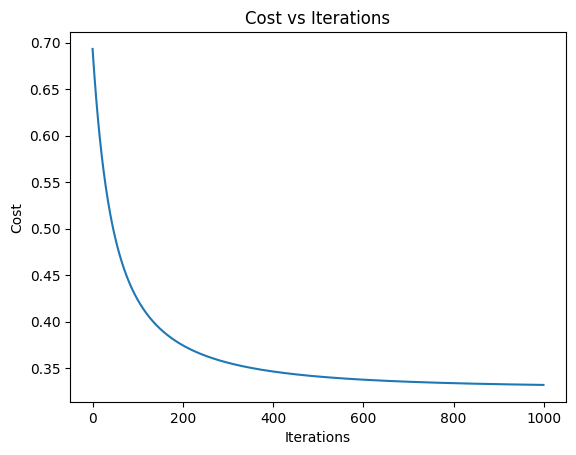

In [19]:
fig, ax = plt.subplots()
ax.plot(costs)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost vs Iterations')
plt.show()